In [7]:
###############  STEP1: EDA  ######################

In [8]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [9]:
df.head()
# Pregnancies: Number of previous pregnancies 
# Glucose: Plasma glucose concentration
# BloodPressure: Diastolic blood pressure
# SkinThickness: Skin fold thickness measured from the triceps
# Insulin : Blood serum insulin concentration
# BMI: Body mass index
# DiabetesPedigreeFunction: A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
# Age: Age in years
# Outcome: The target variable we are trying to predict, 1 for patients that developed diabetes within five years of the initial measurement, and 0 otherwise

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


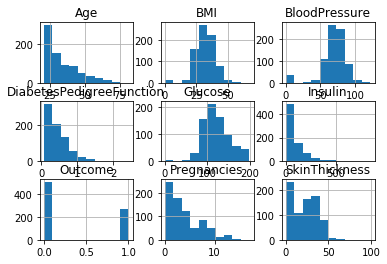

In [15]:
from matplotlib import pyplot as plt
df.hist()
plt.show()
#Observations
# Age- Common age group between 20-30 years old.
# BMI, BloodPressure, and Glucose -  concentration is normally distributed  & 0 values for BMI, BloodPressure, and Glucosedue to missing values
#Target varaible(Outcome) - 65% are no diabetes & remaining 35% are diabetes
#variables are on different scales - the DiabetesPedigreeFunction variable ranges from 0 to ~2.5, while the Insulin variable ranges from 0 to ~800

C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


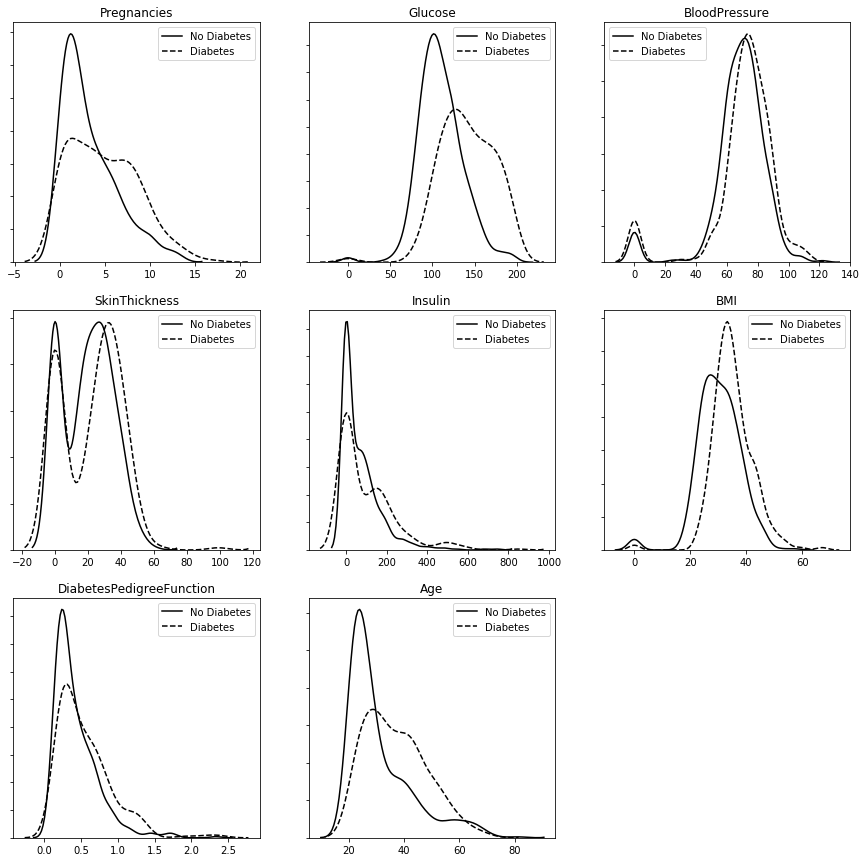

In [17]:
import seaborn as sns

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()
#Observations
# Glucose variable, Avg Glucose value 100 among non-diabetics and  Avg Glucose value 150 among diabetics. Hence, significant difference in blood glucose values for diabetes vs non-diabetics. 
# Glucose, BMI, and Age variables are strong predictors for diabetes. People with diabetes tend to have higher blood glucose level, higher BMI, and are older.
# BloodPressure and SkinThickness variables are poorer predictors for diabetes because there is no significant difference in the distribution between diabetics and non-diabetics. 


In [ ]:
###############  STEP2: Data preprocessing  ######################

In [20]:
#Handling missing values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
#The measurements for Glucose, BloodPressure, SkinThickness, Insulin, and BMI should never be 0(min). Hence find count of zero values for these columns  
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [27]:
#To handle these missing values.
# 1. First, replace the 0 values in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with NaN.
#2. Then, replace the NaN values with the mean of the non-missing values. 
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [62]:
#Data standardization - to transform the numeric variables so that each variable has zero mean and unit variance
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
df.describe().loc[['mean','std','max'],].abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,1.387779e-17,1.387779e-17,0.000000,9.251859e-18,1.156482e-17,9.251859e-18,9.251859e-18,3.469447e-18,0.348958
std,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
max,3.906578e+00,2.541850e+00,4.102655,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.000000


In [63]:
#Splitting the data into training, testing, and validation sets
from sklearn.model_selection import train_test_split
X=df.loc[:, df.columns !='Outcome']
y=df.loc[:,'Outcome']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
###############  STEP3: Model createion  ######################

In [64]:
# Create model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# add first hidden layer
model.add(Dense(32,activation='relu',input_dim=8))
# add second hidden layer
model.add(Dense(16,activation='relu'))
# add output layer
model.add(Dense(1,activation='sigmoid'))

In [65]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
# model training
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
491/491 [==============================] - 1s 2ms/step - loss: 0.7119 - acc: 0.4379
Epoch 2/200
491/491 [==============================] - 0s 67us/step - loss: 0.6684 - acc: 0.6314
Epoch 3/200
491/491 [==============================] - 0s 104us/step - loss: 0.6330 - acc: 0.7108
Epoch 4/200
491/491 [==============================] - 0s 87us/step - loss: 0.5999 - acc: 0.7210
Epoch 5/200
491/491 [==============================] - 0s 77us/step - loss: 0.5639 - acc: 0.7475
Epoch 6/200
491/491 [==============================] - 0s 77us/step - loss: 0.5339 - acc: 0.7597
Epoch 7/200
491/491 [==============================] - 0s 83us/step - loss: 0.5082 - acc: 0.7719
Epoch 8/200
491/491 [==============================] - ETA: 0s - loss: 0.4947 - acc: 0.812 - 0s 85us/step - loss: 0.4900 - acc: 0.7658
Epoch 9/200
491/491 [==============================] - 0s 71us/step - loss: 0.4774 - acc: 0.7739
Epoch 10/200
491/491 [==============================] - 0s 81us/step - loss: 0.4669 - acc

Epoch 84/200
491/491 [==============================] - 0s 154us/step - loss: 0.3192 - acc: 0.8452
Epoch 85/200
491/491 [==============================] - 0s 140us/step - loss: 0.3187 - acc: 0.8452
Epoch 86/200
491/491 [==============================] - 0s 112us/step - loss: 0.3164 - acc: 0.8432
Epoch 87/200
491/491 [==============================] - 0s 132us/step - loss: 0.3166 - acc: 0.8452
Epoch 88/200
491/491 [==============================] - 0s 112us/step - loss: 0.3146 - acc: 0.8513
Epoch 89/200
491/491 [==============================] - 0s 288us/step - loss: 0.3131 - acc: 0.8493
Epoch 90/200
491/491 [==============================] - 0s 179us/step - loss: 0.3128 - acc: 0.8513
Epoch 91/200
491/491 [==============================] - 0s 102us/step - loss: 0.3106 - acc: 0.8452
Epoch 92/200
491/491 [==============================] - 0s 102us/step - loss: 0.3105 - acc: 0.8554
Epoch 93/200
491/491 [==============================] - 0s 183us/step - loss: 0.3076 - acc: 0.8493
Epoch 94/2

In [ ]:
###############  STEP4: Result analysis  ######################

In [68]:
# Testing accuracy
train_scores =model.evaluate(X_train,y_train)
print('training accuracy: %2.f%%\n' %(train_scores[1]*100) )
test_scores=model.evaluate(X_test,y_test)
print('testing accuracy: %2.f%%\n' %(test_scores[1]*100))

491/491 [==============================] - 0s 35us/step
training accuracy: 92%

154/154 [==============================] - 0s 45us/step
testing accuracy: 73%



Text(33.0, 0.5, 'actual')

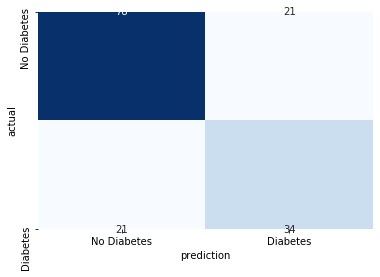

In [106]:
#Confusion matrix - To visualize the true negative, false positive, false negative, and true positives outputs
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred=model.predict_classes(X_test)
c_matrix=confusion_matrix(y_test,y_test_pred)
ax=sns.heatmap(c_matrix,annot=True,
              xticklabels=['No Diabetes','Diabetes'],
              yticklabels=['No Diabetes','Diabetes'],cbar=False,cmap='Blues')

ax.set_xlabel('prediction')
ax.set_ylabel('actual')
#Most predictions are true negatives and true positives (as indicated by the 73% test accuracy in the previous section).

Text(0, 0.5, 'True Positive Rate')

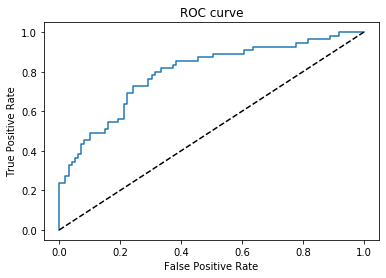

In [107]:
#ROC curve to evaluate our model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#ROC Curve- model is able to differentiate samples of different classes, making good predictions.